Data Scientest Project
Supply Chain - customer satisfaction
Autors: Adam Cleaver, Lukas Topinka

This is a first Jupyter Notebook for initial analysis and graphical representation of given data to be analyzed.
The aim of this project is  to extract information from comments. Here are some areas of work:
    ● Predicting customer satisfaction: regression problem (predicting the number of stars).
    ● Identify the important entities of a message: location, company name...
    ● Extract comments from the comment (delivery problem, defective item,
      etc.): unsupervised approach
    ● Extract from the response of the supplier the words of the comment in
      order to try to predict them only with the comment.

In [2]:
# Packages for initial exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

The given datased was downloaded from website: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/
Since the whole package containing all categories is too big (34GB) and would thus require an extrem computational power, only a category *Appliances* was selected.
The following cells provide an initial data exploration and basic pre-processing.

In [3]:
# Load the given dataset
df = pd.read_json("Appliances.json", lines = True)
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


The loaded dataset *Appliances.json* contains multiple columns with a following explanation:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         602777 non-null  int64 
 1   vote            65262 non-null   object
 2   verified        602777 non-null  bool  
 3   reviewTime      602777 non-null  object
 4   reviewerID      602777 non-null  object
 5   asin            602777 non-null  object
 6   style           137973 non-null  object
 7   reviewerName    602762 non-null  object
 8   reviewText      602453 non-null  object
 9   summary         602649 non-null  object
 10  unixReviewTime  602777 non-null  int64 
 11  image           9258 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 51.2+ MB


• RangeIndex: 602777 entries: This tells us that the DataFrame has a RangeIndex, which means it has default integer row labels starting from 0 up to 602776. It also specifies that there are 602,777 rows or entries in the dataset.
• dtypes: This line provides a summary of the data types in the DataFrame, which include bool (1 column), int64 (2 columns), and object (9 columns).
• memory usage: This line indicates the approximate memory usage of the DataFrame, which is 51.2+ MB.

It also tells us, that the dataset has 12 columns. Here is the summary:
Now, let's break down the information for each column:

• overall: This column contains 602,777 non-null integer values of type int64, indicating that it holds ratings (e.g., 1 to 5) for products, and there are no missing values in this column.
• vote: This column contains 65,262 non-null object values. It represents the number of helpful votes a review has received. The data type is 'object', which suggests that it may contain both numeric and non-numeric values or special characters. It has missing values.
• verified: This column contains 602,777 non-null boolean values (True or False) indicating whether a review is verified or not. There are no missing values in this column.
• reviewTime: This column contains 602,777 non-null object values, representing the time a review was posted. The data type is 'object', which suggests it might need to be converted to a datetime format for further analysis.
• reviewerID: This column contains 602,777 non-null object values, which are unique IDs for reviewers.
• asin: This column contains 602,777 non-null object values, which are unique IDs for products (ASIN).
• style: This column contains 137,973 non-null object values, representing product metadata in a dictionary format. There are missing values in this column.
• reviewerName: This column contains 602,762 non-null object values, which are the names of the reviewers. It has a few missing values.
• reviewText: This column contains 602,453 non-null object values, representing the text of the reviews. It has some missing values.
• summary: This column contains 602,649 non-null object values, representing a summary of the reviews. It has some missing values.
• unixReviewTime: This column contains 602,777 non-null integer values of type int64, representing the time of the review in Unix timestamp format.
• image: This column contains 9,258 non-null object values, representing images that users post after receiving the product. It has many missing values.

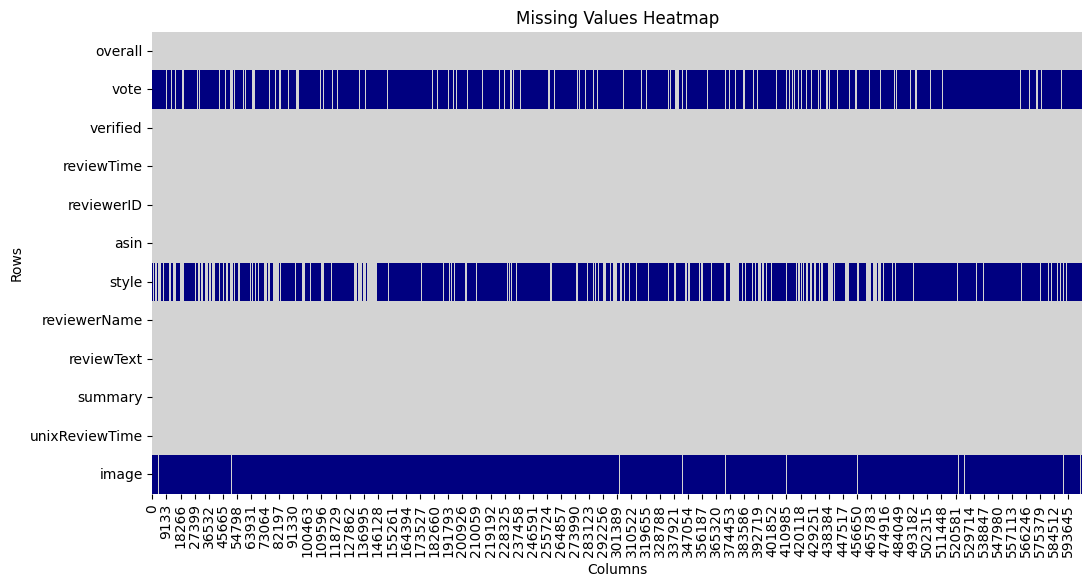

In [5]:
# Transpose the DataFrame to have columns on the y-axis
transposed_df = df.transpose()

# Create a custom color palette
custom_cmap = sns.color_palette(["lightgrey", "navy"])

# Create a heatmap of missing values with custom colors
plt.figure(figsize=(12, 6))
sns.heatmap(transposed_df.isnull(), cbar=False, cmap=custom_cmap)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

*Comment on heatmap with missing values*

In [6]:
# initial preprocessing

# Fill missing values in 'style,' 'reviewerName,' 'reviewText,' and 'summary' with empty strings
columns_to_fill = ['style', 'reviewerName', 'reviewText', 'summary']
df[columns_to_fill] = df[columns_to_fill].astype(str)
df[columns_to_fill] = df[columns_to_fill].replace('', np.nan)

# Convert 'vote' to numeric (assuming 'NaN' means 0)
df['vote'] = df['vote'].str.replace(',', '', regex=True).fillna(0).astype(int)

# Convert reviewTime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format = '%m %d, %Y')

# Delete the 'image' column
# This contains only images posted by users reviewing the product. As only few of them include photos or images to reviews,
# there are many missing values. Furthermore, these images have no representative values for further analysis and can thus be deleted.
df.drop('image', axis=1, inplace=True)

In [7]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5,2,False,2013-11-27,A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400
1,5,0,False,2013-11-01,A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000
2,5,0,False,2013-10-10,A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200
3,5,0,False,2013-10-09,A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800
4,5,10,False,2013-09-07,A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000


*Comment on df.head() after first dataset preprocessing*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         602777 non-null  int64         
 1   vote            602777 non-null  int64         
 2   verified        602777 non-null  bool          
 3   reviewTime      602777 non-null  datetime64[ns]
 4   reviewerID      602777 non-null  object        
 5   asin            602777 non-null  object        
 6   style           602777 non-null  object        
 7   reviewerName    602777 non-null  object        
 8   reviewText      602777 non-null  object        
 9   summary         602777 non-null  object        
 10  unixReviewTime  602777 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 46.6+ MB


*Comment on df.info() after first dataset preprocessing*

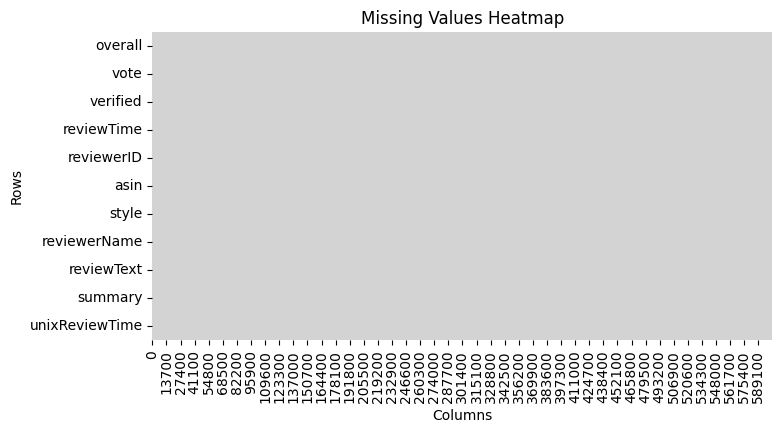

In [9]:
# Transpose the DataFrame to have columns on the y-axis
transposed_df = df.transpose()

# Create a custom color palette
custom_cmap = sns.color_palette(["lightgrey", "navy"])

# Create a heatmap of missing values with custom colors
plt.figure(figsize=(8, 4))
sns.heatmap(transposed_df.isnull(), cbar=False, cmap=custom_cmap)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

*Summary of the first preprocessing steps and follwing steps*

In following section, there will come an initial basic visualisation after first preprocessing steps

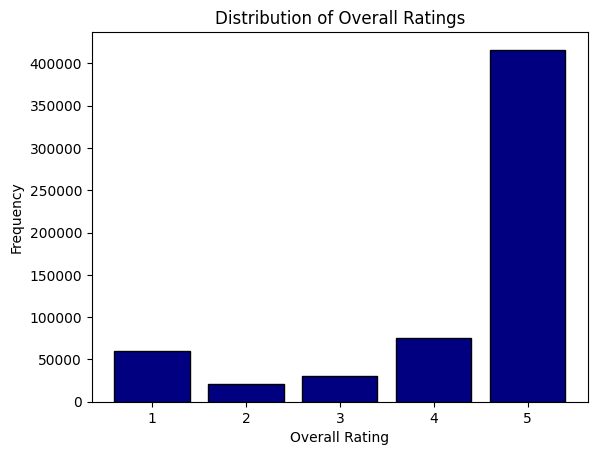

In [10]:
# Histogram for overall ratings
plt.hist(df['overall'], bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color = 'navy', edgecolor = 'black', rwidth = 0.8)
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.xticks(range(1, 6))
plt.show()

*Comment on Distribution of Overall Ratings*

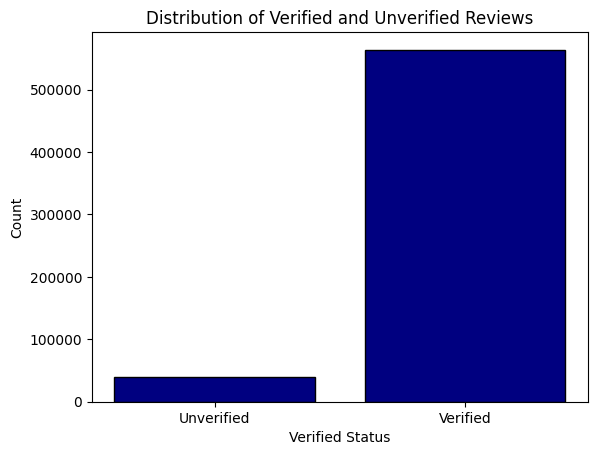

In [11]:
# Bar plot for verified status
verified_counts = df['verified'].value_counts()
plt.bar(verified_counts.index, verified_counts.values, color = 'navy', edgecolor = 'black')
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Distribution of Verified and Unverified Reviews')
plt.xticks([False, True], ['Unverified', 'Verified'])
plt.show()

*Comment on Distribution of Verified and Unverified Reviews*

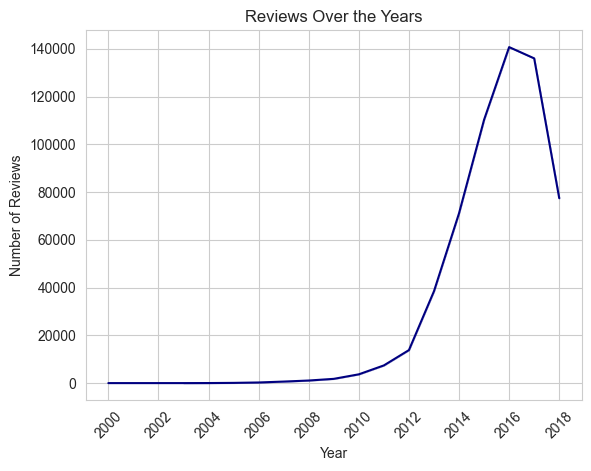

In [19]:
# Time Series Plot for Reviews Over the Years
sns.set_style('whitegrid')
plt.figure()
sns.lineplot(x=df['reviewTime'].dt.year, y='overall', data=df, estimator=len, color = 'navy')
plt.xlabel('Year')
plt.xticks(range(int(df['reviewTime'].dt.year.min()), int(df['reviewTime'].dt.year.max()) + 1, 2), rotation = 45)
plt.ylabel('Number of Reviews')
plt.title('Reviews Over the Years')
plt.show()

Suggested change: simplification for X = -> reviewYear (this would create much simple line easier to understand the trend)